# Competition Model

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp

In [30]:
def competition(t, y, alpha, beta, r_s, r_c, k_s, k_c):
    """Compute right hand side of the competition model based on june sucker and
    common carp populations at the given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing june sucker and common carp populations at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the competition model.
    """
    
    S, C = y
    return (r_s*S*(1 - (S + (alpha*C))/k_s), r_c*C*(1 - (C + (beta*S))/k_c))

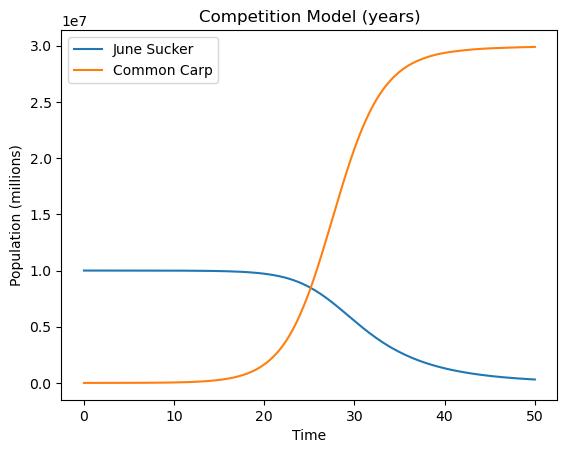

In [23]:
t0, tf = 0, 50
t = np.linspace(t0, tf, 200)
t_span = (t0, tf) # Time Domain
y0 = np.array([10000000, 1000]) # Initial Conditions

## Initial Parameters ##

r_s = 0.1 # June Sucker Growth Rate
r_c = 0.4 # Common Carp Growth Rate
k_s = 10000000 # June Sucker Carrying Capacity
k_c = 30000000 # Common Carp Carrying Capacity
alpha = 0.8 # Competition Coefficient: Impact of Common Carp on June Suckers
beta = 0.2 # Competition Coefficient: Impact of June Suckers on Common Carp

# Solve the System
sol = solve_ivp(competition, t_span, y0, t_eval=t, args=(alpha, beta, r_s, r_c, k_s, k_c))

# Plot June Sucker and Common Carp Populations Over Time
plt.plot(sol.t, sol.y[0], label='June Sucker')
plt.plot(sol.t, sol.y[1], label='Common Carp')
plt.xlabel('Time')
plt.ylabel('Population (millions)')
plt.title('Competition Model (years)')
plt.legend()
plt.show()

Phase Space Diagram

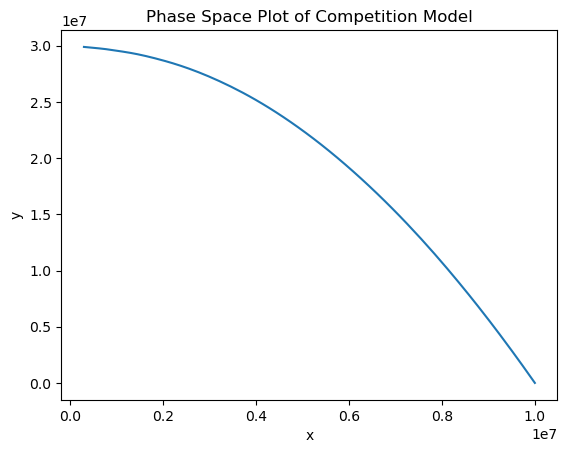

In [24]:
# Phase Space Plot
plt.plot(sol.y[0], sol.y[1])
plt.title('Phase Space Plot of Competition Model')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Equilibrium Points

In [36]:
def competitionEQ(y, alpha, beta, r_s, r_c, k_s, k_c):
    """Compute right hand side of the competition model based on june sucker and
    common carp populations at the given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing june sucker and common carp populations at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the competition model.
    """
    
    S, C = y
    return (r_s*S*(1 - (S + (alpha*C))/k_s), r_c*C*(1 - (C + (beta*S))/k_c))

# Find equilibrium point
initial_guess = np.array([0.1, 0.4])
equilibrium = fsolve(competitionEQ, initial_guess, args=(alpha, beta, r_s, r_c, k_s, k_c))

Stability Analysis

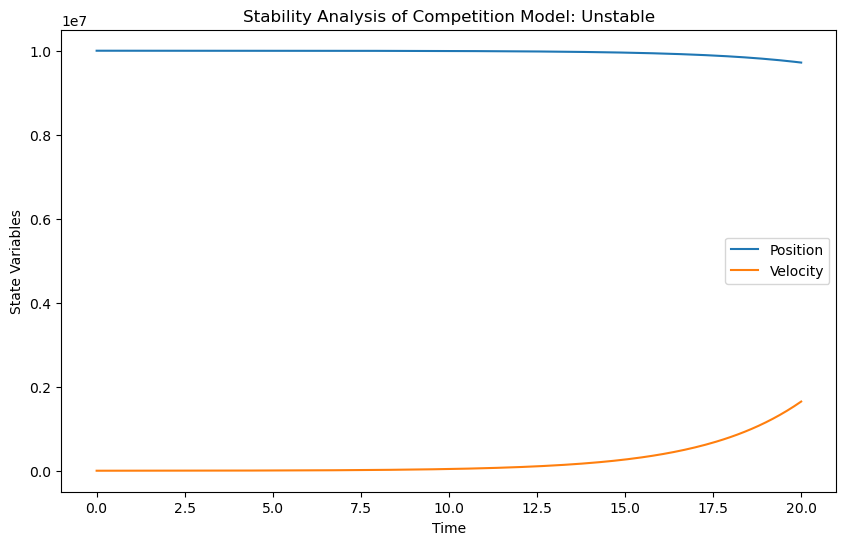

In [ ]:
# Jacobian
def jacobian(S, C, alpha, beta, r_s, r_c, k_s, k_c):
    return np.array([[r_s*(-alpha*C + k_s - 2*S) / k_s, -(alpha*r_s*S) / k_s],
                  [-(beta*r_c*C) / k_c, r_c*(-beta*S + k_c - 2*C) / k_c]])

# Stability Analysis
def stability(S, C, alpha, beta, r_s, r_c, k_s, k_c):
    J = jacobian(S, C, alpha, beta, r_s, r_c, k_s, k_c)
    eigenvalues = np.linalg.eigvals(J)
    stability = "Stable" if np.all(np.real(eigenvalues) < 0) else "Unstable"
    return stability

## Initial Parameters ##
t0, tf = 0, 50
t = np.linspace(t0, tf, 200)
t_span = (t0, tf) # Time Domain
y0 = np.array([10000000, 1000]) # START SLIGHTLY AWAY FROM THE EQUILIBRIUM!!!

r_s = 0.1 # June Sucker Growth Rate
r_c = 0.4 # Common Carp Growth Rate
k_s = 10000000 # June Sucker Carrying Capacity
k_c = 30000000 # Common Carp Carrying Capacity
alpha = 0.8 # Competition Coefficient: Impact of Common Carp on June Suckers
beta = 0.2 # Competition Coefficient: Impact of June Suckers on Common Carp

# Solve the System
sol = solve_ivp(competition, t_span, y0, args=(alpha, beta, r_s, r_c, k_s, k_c), dense_output=True)

# Evaluate Stability
stable = stability(equilibrium[0], equilibrium[1], alpha, beta, r_s, r_c, k_s, k_c)

# Generate Points for Plotting
t = np.linspace(0, 20, 200)
y = sol.sol(t)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, y[0], label='Position')
plt.plot(t, y[1], label='Velocity')
plt.title(f'Stability Analysis of Competition Model: {stable}')
plt.xlabel('Time')
plt.ylabel('State Variables')
plt.legend()
plt.show()